###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [97]:
conGraficos=True

# Funciones

In [98]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [99]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [100]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [101]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [102]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [103]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [210]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    fecha_max=data_reg['FECHA'].max()
    
    for i in range(1,fecha_max+1):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,fecha_max+1):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [105]:
data_c0= pd.read_csv('NODOS_FILTRADOS_base1.csv',sep=';', header = 0)

In [106]:
data_c0.describe()

,FECHA,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
count,46349.000000,46349.000000,46349.000000,46349.000000,46349.000000,46349.0,46349.000000,46349.000000,46349.000000,46349.000000,...,46349.000000,46349.000000,46349.000000,46349.0,45693.000000,35178.000000,46071.000000,46348.000000,46348.000000,45718.000000
mean,5.500097,333.346760,0.429632,0.209519,0.686595,0.0,0.207577,0.584889,0.232540,0.144879,...,0.000324,4.961315,0.015588,10.0,1.318020,0.984395,1.278653,0.014829,0.002586,1.041235
std,2.872267,136.077237,0.723869,0.477200,0.905182,0.0,0.496251,0.893424,0.496768,0.389629,...,0.017987,3.376000,0.009829,0.0,1.465294,0.201259,1.120821,0.011395,0.004617,0.690865
min,1.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.001466,10.0,0.000000,0.446971,0.100062,0.000000,0.000000,0.000000
25%,3.000000,237.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.009132,10.0,0.562690,0.841612,0.863484,0.007927,0.000000,0.551595
50%,6.000000,315.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.013774,10.0,1.029109,0.968077,1.120815,0.011770,0.001309,0.921271
75%,8.000000,410.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,6.000000,0.019704,10.0,1.730218,1.103540,1.464591,0.017857,0.003155,1.407127
max,10.000000,1366.000000,8.000000,5.000000,9.000000,0.0,8.000000,15.000000,5.000000,4.000000,...,1.000000,71.000000,0.233766,10.0,119.079644,2.567901,100.000000,0.220000,0.285714,13.884362


In [107]:
data_c0.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS',
       'OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO', 'BAJAS_TOTAL',
       'ind_churn', 'nMeses', 'ALFA', 'ALFA_tarifa', 'BETA',
       'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'MEGA', 'DIVISION', 'AREA',
       'ZONA', 'CIUDAD', 'DISTRITO'],
      dtype='object')

In [108]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
#sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [109]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [110]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [111]:
data_c0['BAJAS_TOTAL'].sum()

229952

In [112]:
data_c0['BAJAS_1.TOTAL']=data_c0['BAJAS_TOTAL']

In [113]:
data_c0['BAJAS_1.TOTAL'].sum()

229952

In [114]:
data_c0['ind_churn']=data_c0['BAJAS_1.TOTAL']

In [115]:
data_c0['COD_NODO'].value_counts().max()

10

In [116]:
#Eliminar validación ==1
##data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [117]:
##data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

In [118]:
##data_c0['COD_NODO'].nunique()

In [119]:
##res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [120]:
##res_nodo['val_ind'].value_counts()

In [121]:
##data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [122]:
data_c0['COD_NODO'].nunique()

4635

# Val Configuraciones

In [123]:
DataSetEntregable_totales=pd.DataFrame()

In [124]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [125]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [126]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [127]:
RV_nal_c0=dic_corr_ind(data_c0)

In [128]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

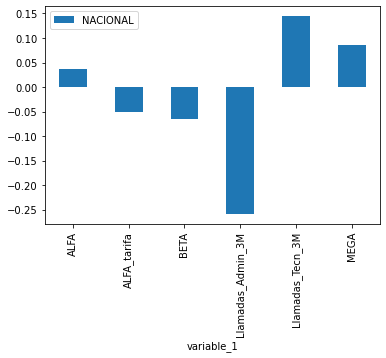

In [129]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [130]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [131]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [132]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
1,0.066594,-0.068435,0.017291,-0.229066,0.165093,0.070811
2,0.072841,-0.095462,-0.012851,-0.220189,0.17918,0.097699
3,0.060481,-0.109208,-0.042124,-0.247415,0.164678,0.098063
4,0.029249,-0.057078,-0.096473,-0.230603,0.128959,0.095725
5,0.048373,-0.052204,-0.117746,-0.225665,0.116384,0.133752
6,0.035645,-0.079873,-0.131253,-0.201136,0.155567,0.121458
7,0.002922,-0.069058,-0.131607,-0.274471,0.116183,0.087705
8,0.037222,-0.058806,-0.09896,-0.241398,0.171051,0.106401
9,-0.012513,0.13939,-0.106187,-0.261349,0.146276,0.049535
10,0.006957,0.154504,-0.114485,-0.289227,0.097635,0.079117


In [134]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

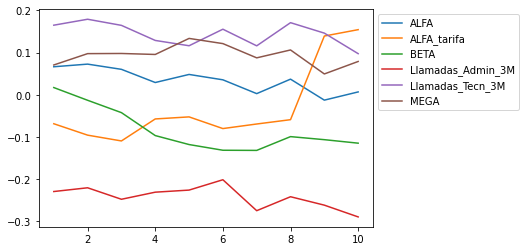

In [135]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [136]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [137]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,6722413.0
REGION OCCIDENTE,3076658.0
REGION NOROCCIDENTE,2699008.0
REGION ORIENTE,1787233.0
REGION COSTA,1164977.0


In [138]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,6025714.0
CALI,1367027.0
MEDELLIN,899675.0
BARRANQUILLA,391876.0
PASTO,332995.0
PEREIRA,316808.0


In [139]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA OCCIDENTE,1617093.0
BOGOTA NORTE,1608239.0
BOGOTA SUR,1419709.0
BOGOTA ORIENTE,1380673.0


### Analisis regionales

In [140]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE',
 'REGION ORIENTE',
 'REGION COSTA']

In [141]:
dic_resultados={}

In [142]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


In [143]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE
REGION ORIENTE
REGION COSTA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [144]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
344,ALFA,0.037478
366,ALFA_tarifa,-0.050264
388,BETA,-0.064595
410,Llamadas_Admin_3M,-0.259034
432,Llamadas_Tecn_3M,0.144200
454,MEGA,0.085830


In [145]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [146]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
NACIONAL,0.037478,-0.050264,-0.064595,-0.259034,0.1442,0.08583
REGION CENTRO,0.008131,-0.112177,-0.074645,-0.300386,0.137315,0.051643
REGION NOROCCIDENTE,0.023564,0.044687,-0.082858,-0.256722,0.150002,0.106575
REGION OCCIDENTE,0.114082,0.047693,-0.043116,-0.203509,0.137582,0.15588
REGION ORIENTE,0.041992,0.033707,-0.044652,-0.234451,0.16823,0.080582
REGION COSTA,-0.041882,0.079886,-0.077016,-0.198989,0.139974,0.005337


In [147]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
NACIONAL,0.037478,-0.050264,-0.064595,-0.259034,0.1442,0.08583
REGION CENTRO,0.008131,-0.112177,-0.074645,-0.300386,0.137315,0.051643
REGION NOROCCIDENTE,0.023564,0.044687,-0.082858,-0.256722,0.150002,0.106575
REGION OCCIDENTE,0.114082,0.047693,-0.043116,-0.203509,0.137582,0.15588
REGION ORIENTE,0.041992,0.033707,-0.044652,-0.234451,0.16823,0.080582
REGION COSTA,-0.041882,0.079886,-0.077016,-0.198989,0.139974,0.005337


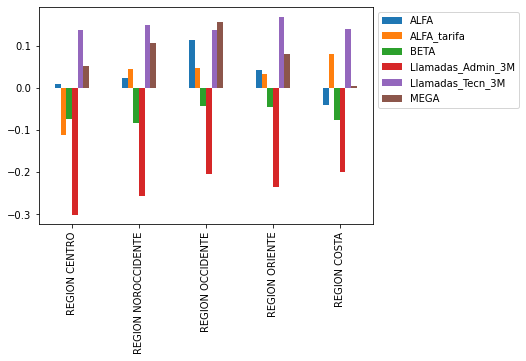

In [148]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [149]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [151]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,CATEGORIA
1,0.066594,-0.068435,0.017291,-0.229066,0.165093,0.070811,NACIONAL
2,0.072841,-0.095462,-0.012851,-0.220189,0.17918,0.097699,NACIONAL
3,0.060481,-0.109208,-0.042124,-0.247415,0.164678,0.098063,NACIONAL
4,0.029249,-0.057078,-0.096473,-0.230603,0.128959,0.095725,NACIONAL
5,0.048373,-0.052204,-0.117746,-0.225665,0.116384,0.133752,NACIONAL
...,...,...,...,...,...,...,...
7,-0.038706,0.09542,-0.12733,-0.213233,0.095577,0.051427,REGION COSTA
8,-0.11393,0.160288,-0.094733,-0.157782,0.085685,-0.070352,REGION COSTA
9,-0.203099,0.154704,-0.142557,-0.226609,0.123984,-0.137212,REGION COSTA
10,-0.04579,0.097749,-0.140701,-0.217584,0.110963,0.033704,REGION COSTA


## Ciudades

In [152]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'BARRANQUILLA', 'PASTO', 'PEREIRA'], dtype='object', name='CIUDAD')

In [153]:
dic_resultados_ciudad={}

In [154]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PASTO
PEREIRA


In [155]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PASTO
PEREIRA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [157]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
NACIONAL,0.037478,-0.050264,-0.064595,-0.259034,0.1442,0.08583
BOGOTA,-0.003314,-0.113864,-0.078572,-0.301049,0.134129,0.041954
CALI,0.150166,0.041241,-0.025024,-0.168753,0.130542,0.20494
MEDELLIN,0.066247,0.04227,-0.030377,-0.159982,0.185836,0.114339
BARRANQUILLA,-0.045832,0.121711,-0.130247,-0.164989,0.155327,0.016324
PASTO,0.111687,0.085237,-0.124852,-0.248451,0.143106,0.197975
PEREIRA,0.070528,0.212426,-0.118531,-0.345531,0.078881,0.160181


In [158]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
NACIONAL,0.037478,-0.050264,-0.064595,-0.259034,0.1442,0.08583
REGION CENTRO,0.008131,-0.112177,-0.074645,-0.300386,0.137315,0.051643
REGION NOROCCIDENTE,0.023564,0.044687,-0.082858,-0.256722,0.150002,0.106575
REGION OCCIDENTE,0.114082,0.047693,-0.043116,-0.203509,0.137582,0.15588
REGION ORIENTE,0.041992,0.033707,-0.044652,-0.234451,0.16823,0.080582
REGION COSTA,-0.041882,0.079886,-0.077016,-0.198989,0.139974,0.005337
BOGOTA,-0.003314,-0.113864,-0.078572,-0.301049,0.134129,0.041954
CALI,0.150166,0.041241,-0.025024,-0.168753,0.130542,0.20494
MEDELLIN,0.066247,0.04227,-0.030377,-0.159982,0.185836,0.114339
BARRANQUILLA,-0.045832,0.121711,-0.130247,-0.164989,0.155327,0.016324


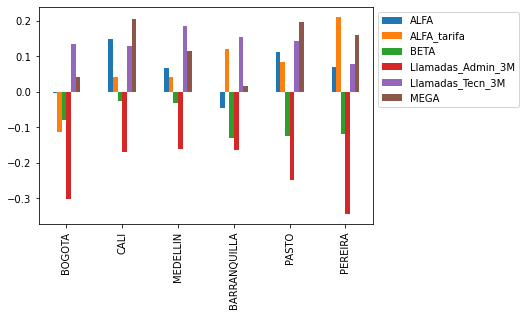

In [159]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [160]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



8
9
10
11


In [161]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,CATEGORIA
1,0.066594,-0.068435,0.017291,-0.229066,0.165093,0.070811,NACIONAL
2,0.072841,-0.095462,-0.012851,-0.220189,0.17918,0.097699,NACIONAL
3,0.060481,-0.109208,-0.042124,-0.247415,0.164678,0.098063,NACIONAL
4,0.029249,-0.057078,-0.096473,-0.230603,0.128959,0.095725,NACIONAL
5,0.048373,-0.052204,-0.117746,-0.225665,0.116384,0.133752,NACIONAL
...,...,...,...,...,...,...,...
7,0.0401,0.204876,-0.131751,-0.407379,0.319223,0.150036,PEREIRA
8,0.084652,0.401245,-0.196151,-0.4343,0.067385,0.293564,PEREIRA
9,0.058199,0.250767,-0.131023,-0.234301,-0.02305,0.163309,PEREIRA
10,0.007445,0.198815,-0.278482,-0.203448,0.091505,0.193198,PEREIRA


### Bogotá

In [162]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [163]:
dic_resultados_Bogota={}

In [164]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


In [165]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


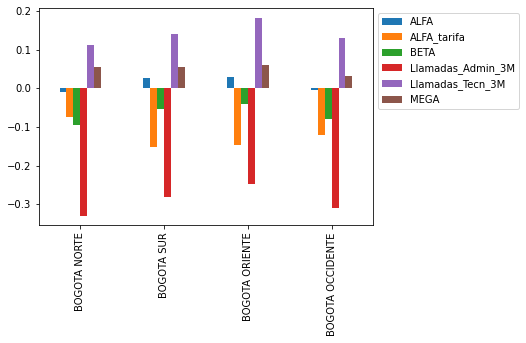

In [166]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [167]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
BOGOTA NORTE,-0.008378,-0.073661,-0.094146,-0.329276,0.113664,0.055038
BOGOTA SUR,0.026609,-0.151962,-0.052773,-0.281088,0.140725,0.055717
BOGOTA ORIENTE,0.029086,-0.146383,-0.040323,-0.248489,0.182666,0.061042
BOGOTA OCCIDENTE,-0.004584,-0.121957,-0.080433,-0.308453,0.129945,0.032547


In [168]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA
NACIONAL,0.037478,-0.050264,-0.064595,-0.259034,0.1442,0.08583
REGION CENTRO,0.008131,-0.112177,-0.074645,-0.300386,0.137315,0.051643
REGION NOROCCIDENTE,0.023564,0.044687,-0.082858,-0.256722,0.150002,0.106575
REGION OCCIDENTE,0.114082,0.047693,-0.043116,-0.203509,0.137582,0.15588
REGION ORIENTE,0.041992,0.033707,-0.044652,-0.234451,0.16823,0.080582
REGION COSTA,-0.041882,0.079886,-0.077016,-0.198989,0.139974,0.005337
BOGOTA,-0.003314,-0.113864,-0.078572,-0.301049,0.134129,0.041954
CALI,0.150166,0.041241,-0.025024,-0.168753,0.130542,0.20494
MEDELLIN,0.066247,0.04227,-0.030377,-0.159982,0.185836,0.114339
BARRANQUILLA,-0.045832,0.121711,-0.130247,-0.164989,0.155327,0.016324


### Resultado Atemporal

In [169]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [170]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [171]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [172]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [173]:
data_reg=data_c0.copy()

In [174]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M']

In [175]:
data_reg.set_index('COD_NODO',inplace=True)

In [176]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [177]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.241019
ALFA                 0.014153
BETA                 0.005998
MEGA                 0.013614
Llamadas_Admin_3M    0.000022
Llamadas_Tecn_3M     0.000022
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [178]:
data_reg=data_reg.dropna()

In [179]:
colums_reg=list(data_reg.columns)

In [180]:
colums_reg.remove('FECHA')

In [181]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'ind_churn']

In [182]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [183]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [184]:
colums_reg.remove('ind_churn')

In [185]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M']

### Seleccion Variables Significativas

In [186]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs       pvalues           Features   VIF
0 -0.019172  3.897339e-12        ALFA_tarifa  4.22
1 -0.085593  8.028538e-02               ALFA  9.35
2 -0.087598  6.815896e-02               BETA  7.01
3  0.122436  1.349349e-45               MEGA  6.32
4 -0.246392  0.000000e+00  Llamadas_Admin_3M  3.00
5  0.026648  1.370484e-02   Llamadas_Tecn_3M  1.57
      coefs   pvalues Features   VIF
1 -0.085593  0.080285     ALFA  9.35
2
      coefs       pvalues           Features   VIF
0 -0.019018  5.635351e-12        ALFA_tarifa  3.22
1 -0.160593  1.423873e-11               BETA  2.02
2  0.110461  9.971012e-98               MEGA  2.67
3 -0.246530  0.000000e+00  Llamadas_Admin_3M  2.98
4  0.026511  1.419789e-02   Llamadas_Tecn_3M  1.57
      coefs   pvalues          Features   VIF
4  0.026511  0.014198  Llamadas_Tecn_3M  1.57


,coefs,pvalues,Features,VIF
0,-0.019018,5.635351e-12,ALFA_tarifa,3.22
1,-0.160593,1.423873e-11,BETA,2.02
2,0.110461,9.971012e-98,MEGA,2.67
3,-0.246530,0.000000e+00,Llamadas_Admin_3M,2.98
4,0.026511,1.419789e-02,Llamadas_Tecn_3M,1.57


In [187]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M']

### Nacional

In [188]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [189]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     631.1
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:51:33   Log-Likelihood:                 56634.
No. Observations:               34839   AIC:                        -1.133e+05
Df Residuals:                   34833   BIC:                        -1.132e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0729      0.001     70.410      0.000       0.071       0.075
ALFA_tarifa          -0.0190      0.003     -6.891      0.000      -0.024      -0.014
BETA                 -0.1606      0.024     -6.758      0.000      -0.207      -0.114
MEGA                  0.1105      0.005     21.047      0.000       0.100       0.121
Llamadas_Admin_3M    -0.2465      0.005    -48.647      0.000      -0.256      -0.237
Llamadas_Tecn_3M      0.0265      0.011      2.452      0.014       0.005       0.048
==============================================================================
Omnibus:                    24480.319   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1002718.564
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      28.637   Cond. No.                         96.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,ALFA_tarifa,3.22
3,Llamadas_Admin_3M,2.98
2,MEGA,2.67
1,BETA,2.02
4,Llamadas_Tecn_3M,1.57


In [191]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

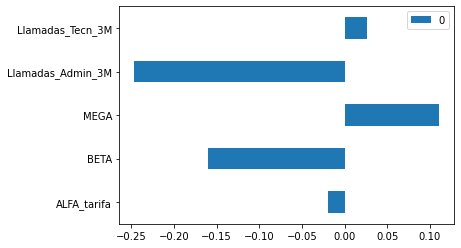

In [192]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [193]:
df_coef_nal

,coefs
const,0.072901
ALFA_tarifa,-0.019018
BETA,-0.160593
MEGA,0.110461
Llamadas_Admin_3M,-0.246530
Llamadas_Tecn_3M,0.026511


In [194]:
df_vif_nal=vif

In [195]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [196]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.019018,-0.160593,0.110461,-0.24653,0.026511


In [197]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M
index,,,,,
NACIONAL,-0.019018,-0.160593,0.110461,-0.24653,0.026511


## Regresión en el tiempo

In [202]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,ind_churn,FECHA
COD_NODO,,,,,,,,
02S,0.390368,0.006362,0.008397,0.058120,0.114352,0.030839,0.042857,1
0AR,0.394703,0.008478,0.012095,0.055574,0.069900,0.011139,0.057143,1
0BZ,0.225530,0.005656,0.009016,0.048470,0.082286,0.022626,0.100000,1
0DB,0.264489,0.006611,0.008875,0.057470,0.079716,0.006425,0.114286,1
0DD,0.277928,0.007638,0.008826,0.066724,0.059375,0.007710,0.014286,1
...,...,...,...,...,...,...,...,...
ZT2,0.193738,0.010221,0.012161,0.066664,0.048254,0.015860,0.114286,10
ZT3,0.253240,0.006595,0.007006,0.070698,0.055004,0.004591,0.071429,10
ZUL,0.318070,0.011260,0.009269,0.094128,0.036872,0.015208,0.071429,10


In [209]:
data_reg['FECHA'].max()

10

In [211]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [212]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10
const,0.072901,0.072622,0.066599,0.077597,0.072743,0.067712,0.070279,0.083860,0.070816,0.054975,0.058636
ALFA_tarifa,-0.019018,-0.023138,-0.028328,-0.047559,-0.020626,-0.014061,-0.026629,-0.028364,-0.026662,0.072574,0.086675
BETA,-0.160593,0.059558,-0.223575,-0.234765,-0.137948,-0.218960,-0.137716,-0.389209,-0.147633,-0.074068,-0.464527
MEGA,0.110461,0.085281,0.093863,0.078129,0.117479,0.134225,0.116199,0.128015,0.141549,0.160897,0.176328
Llamadas_Admin_3M,-0.246530,-0.217270,-0.171063,-0.192835,-0.237226,-0.266221,-0.259846,-0.296237,-0.248579,-0.313881,-0.320236
Llamadas_Tecn_3M,0.026511,0.007209,0.006228,0.041196,0.024182,0.032623,0.043472,0.050115,0.022095,0.089789,-0.008774


In [213]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M
1,-0.023138,0.059558,0.085281,-0.217270,0.007209
2,-0.028328,-0.223575,0.093863,-0.171063,0.006228
3,-0.047559,-0.234765,0.078129,-0.192835,0.041196
4,-0.020626,-0.137948,0.117479,-0.237226,0.024182
5,-0.014061,-0.218960,0.134225,-0.266221,0.032623
6,-0.026629,-0.137716,0.116199,-0.259846,0.043472
7,-0.028364,-0.389209,0.128015,-0.296237,0.050115
8,-0.026662,-0.147633,0.141549,-0.248579,0.022095
9,0.072574,-0.074068,0.160897,-0.313881,0.089789
10,0.086675,-0.464527,0.176328,-0.320236,-0.008774


In [214]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

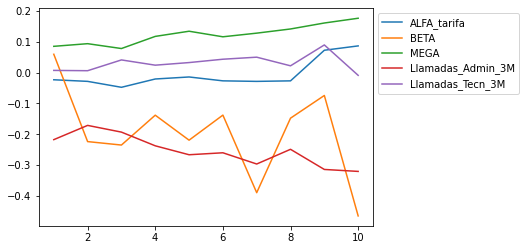

In [215]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [257]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.454811,0.271966,0.258566,0.410284,0.146744,0.264109,0.288480,0.699387,0.044927,7
KRI,0.596127,0.157346,0.295460,0.210943,0.081397,0.076579,0.225495,0.359557,0.048205,7
5B6022,0.450642,0.273162,0.144124,0.673991,0.711058,0.824261,0.565648,0.448781,0.259869,3
1601,0.482496,0.324608,0.149207,0.778936,0.204570,0.038492,0.536195,0.642779,0.076234,6
CLD,0.457082,0.166712,0.200199,0.313661,0.272212,0.135981,0.631487,0.587460,0.123671,11
...,...,...,...,...,...,...,...,...,...,...
SDT,0.612386,0.305873,0.366969,0.337286,0.626425,0.405777,0.289907,0.503078,0.201877,3
CS21,0.241796,0.286965,0.162958,0.641003,0.220486,0.029633,0.477821,0.696087,0.163850,7
S04,0.486714,0.445516,0.319902,0.556250,0.400274,0.148976,0.346647,0.336555,0.195794,11


In [258]:
data_reg_nor=data_reg.copy()

In [259]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [260]:
data_reg_nor_temp=data_reg_nor.copy()

In [261]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4        7
KRI        7
5B6022     3
1601       6
CLD       11
          ..
SDT        3
CS21       7
S04       11
LOM2       3
472D       4
Name: FECHA, Length: 26777, dtype: int64

## Regional

In [262]:
dic_resultados_reg={}

In [263]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [264]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [265]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [266]:
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.030632,0.038519,0.040668,0.302021,0.027529,-0.014619,-0.035861
REGION COSTA,-0.047845,0.004133,0.047516,0.263912,0.006613,0.013721,-0.048401
REGION ORIENTE,-0.048217,0.030830,0.031260,0.305342,0.040384,-0.029266,0.000980
REGION CENTRO,-0.059072,0.047209,0.033256,0.287626,0.034575,-0.006037,-0.040344
REGION NOROCCIDENTE,-0.054216,0.037915,0.055950,0.301830,0.035823,0.026873,-0.023516
REGION OCCIDENTE,-0.014947,0.033351,0.059163,0.364819,0.042168,-0.003271,-0.029025


In [267]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.030632,0.038519,0.040668,0.302021,0.027529,-0.014619,-0.035861
REGION COSTA,-0.047845,0.004133,0.047516,0.263912,0.006613,0.013721,-0.048401
REGION ORIENTE,-0.048217,0.030830,0.031260,0.305342,0.040384,-0.029266,0.000980
REGION CENTRO,-0.059072,0.047209,0.033256,0.287626,0.034575,-0.006037,-0.040344
REGION NOROCCIDENTE,-0.054216,0.037915,0.055950,0.301830,0.035823,0.026873,-0.023516
REGION OCCIDENTE,-0.014947,0.033351,0.059163,0.364819,0.042168,-0.003271,-0.029025


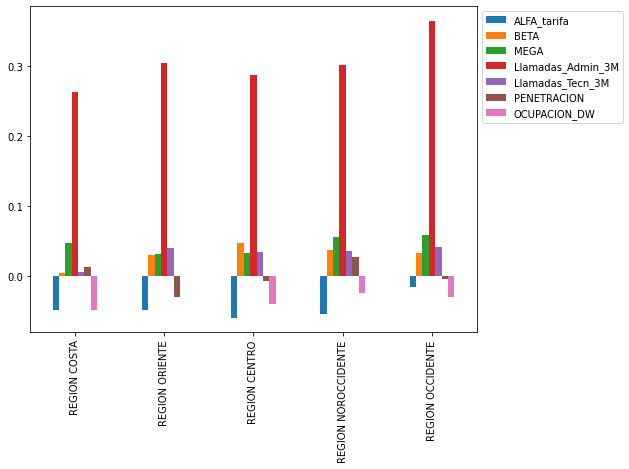

In [268]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [269]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [270]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [271]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.012206,0.017028,0.054104,0.278009,0.016514,0.009970,-0.028461,NACIONAL
2,-0.028882,0.018082,0.050490,0.271270,0.016194,0.000266,-0.024024,NACIONAL
3,-0.034312,0.055565,0.042587,0.255272,0.012534,-0.011092,-0.031992,NACIONAL
4,-0.010144,0.021195,0.035851,0.315526,0.001860,-0.010099,-0.025661,NACIONAL
5,-0.022851,0.027990,0.041589,0.320328,0.034042,-0.018343,-0.035622,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.030959,0.017590,0.086114,0.463226,0.029860,-0.019977,-0.046329,REGION OCCIDENTE
8,-0.008341,-0.013742,0.093657,0.496238,-0.006070,-0.020712,-0.037747,REGION OCCIDENTE
9,-0.013868,0.002961,0.057574,0.376736,0.016613,0.001398,-0.078485,REGION OCCIDENTE
10,-0.037925,-0.017870,0.048116,0.439923,-0.009389,-0.022995,-0.031931,REGION OCCIDENTE


## Ciudades

In [272]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
VILLAVICENCIO
BUCARAMANGA


In [273]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
VILLAVICENCIO
BUCARAMANGA


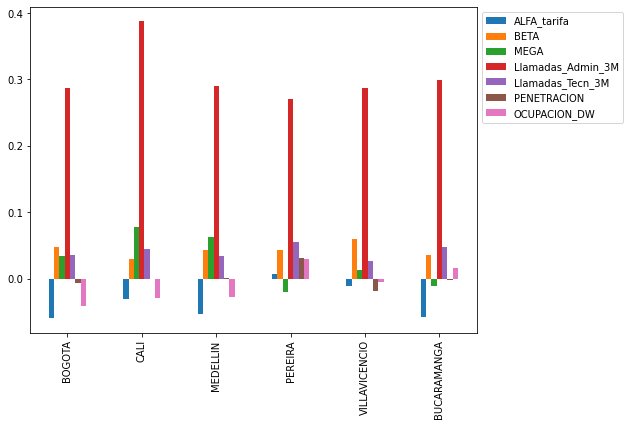

In [274]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [275]:
df_coef_T[1:]

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.059184,0.047146,0.033892,0.286794,0.035135,-0.006027,-0.040535
CALI,-0.031119,0.029702,0.077335,0.387349,0.043967,-0.001108,-0.029015
MEDELLIN,-0.053290,0.043878,0.062536,0.289713,0.034478,0.001641,-0.027399
PEREIRA,0.006550,0.043461,-0.020657,0.270396,0.054742,0.031594,0.028968
VILLAVICENCIO,-0.011591,0.059086,0.013142,0.286444,0.026630,-0.018618,-0.004634
BUCARAMANGA,-0.057054,0.036104,-0.011039,0.299629,0.048058,-0.002318,0.015524


In [276]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.030632,0.038519,0.040668,0.302021,0.027529,-0.014619,-0.035861
REGION COSTA,-0.047845,0.004133,0.047516,0.263912,0.006613,0.013721,-0.048401
REGION ORIENTE,-0.048217,0.030830,0.031260,0.305342,0.040384,-0.029266,0.000980
REGION CENTRO,-0.059072,0.047209,0.033256,0.287626,0.034575,-0.006037,-0.040344
REGION NOROCCIDENTE,-0.054216,0.037915,0.055950,0.301830,0.035823,0.026873,-0.023516
REGION OCCIDENTE,-0.014947,0.033351,0.059163,0.364819,0.042168,-0.003271,-0.029025
BOGOTA,-0.059184,0.047146,0.033892,0.286794,0.035135,-0.006027,-0.040535
CALI,-0.031119,0.029702,0.077335,0.387349,0.043967,-0.001108,-0.029015
MEDELLIN,-0.053290,0.043878,0.062536,0.289713,0.034478,0.001641,-0.027399
PEREIRA,0.006550,0.043461,-0.020657,0.270396,0.054742,0.031594,0.028968


#### Analisis temporal

In [119]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


In [120]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.034826,0.067179,0.182965,0.009591,-0.046767,-0.079915,NACIONAL
2,-0.048136,0.058065,0.177800,0.008459,-0.039580,-0.077058,NACIONAL
3,-0.054716,0.062117,0.182018,0.002891,-0.049099,-0.078742,NACIONAL
4,-0.041576,0.041840,0.179835,0.014012,-0.052311,-0.076536,NACIONAL
5,-0.039904,0.060958,0.181200,0.014948,-0.054211,-0.075948,NACIONAL
...,...,...,...,...,...,...,...
7,-0.120438,0.004505,0.285321,-0.011450,-0.001853,-0.062834,BUCARAMANGA
8,-0.091111,0.070710,0.252637,-0.005460,-0.083992,-0.054975,BUCARAMANGA
9,-0.136729,0.130422,0.213917,-0.035163,0.019083,-0.051455,BUCARAMANGA
10,0.010373,0.023550,0.197130,-0.016790,0.054918,-0.088489,BUCARAMANGA


## Bogota

In [121]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [122]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [123]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [124]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.048792,0.054289,0.188748,0.009404,-0.047854,-0.081086
REGION COSTA,-0.086276,0.044457,0.195408,0.003922,-0.058002,-0.076740
REGION ORIENTE,-0.063026,0.048053,0.205953,-0.000506,-0.074885,-0.050496
REGION CENTRO,-0.069199,0.049801,0.179292,0.010830,-0.032233,-0.087490
REGION OCCIDENTE,-0.024325,0.063579,0.214202,0.015697,-0.068869,-0.068263
REGION NOROCCIDENTE,-0.039010,0.056319,0.192099,0.013261,-0.070523,-0.069459
BOGOTA,-0.067696,0.049668,0.179673,0.010871,-0.031315,-0.088621
CALI,-0.050146,0.076513,0.243765,0.016590,-0.066950,-0.074805
MEDELLIN,-0.045571,0.055578,0.198987,0.013234,-0.111274,-0.083114
BARRANQUILLA,-0.082119,0.043014,0.187480,0.001316,-0.010802,-0.070073


### Analisis Temporal

In [125]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [126]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.034826,0.067179,0.182965,0.009591,-0.046767,-0.079915,NACIONAL
2,-0.048136,0.058065,0.177800,0.008459,-0.039580,-0.077058,NACIONAL
3,-0.054716,0.062117,0.182018,0.002891,-0.049099,-0.078742,NACIONAL
4,-0.041576,0.041840,0.179835,0.014012,-0.052311,-0.076536,NACIONAL
5,-0.039904,0.060958,0.181200,0.014948,-0.054211,-0.075948,NACIONAL
...,...,...,...,...,...,...,...
7,-0.009003,0.007458,0.172117,0.013536,-0.030274,-0.095803,BOGOTA SUR
8,-0.007840,0.054437,0.172811,0.016967,-0.015431,-0.087210,BOGOTA SUR
9,-0.007704,0.041220,0.172257,0.001070,-0.011021,-0.067227,BOGOTA SUR
10,-0.047125,0.032474,0.212933,0.014178,-0.062698,-0.100967,BOGOTA SUR


In [127]:
### Guardar Archivo

In [128]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [129]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [130]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.034826,0.067179,0.182965,0.009591,-0.046767,-0.079915,NACIONAL
2,-0.048136,0.058065,0.177800,0.008459,-0.039580,-0.077058,NACIONAL
3,-0.054716,0.062117,0.182018,0.002891,-0.049099,-0.078742,NACIONAL
4,-0.041576,0.041840,0.179835,0.014012,-0.052311,-0.076536,NACIONAL
5,-0.039904,0.060958,0.181200,0.014948,-0.054211,-0.075948,NACIONAL
...,...,...,...,...,...,...,...
7,-0.009003,0.007458,0.172117,0.013536,-0.030274,-0.095803,BOGOTA SUR
8,-0.007840,0.054437,0.172811,0.016967,-0.015431,-0.087210,BOGOTA SUR
9,-0.007704,0.041220,0.172257,0.001070,-0.011021,-0.067227,BOGOTA SUR
10,-0.047125,0.032474,0.212933,0.014178,-0.062698,-0.100967,BOGOTA SUR
